# MODEL 3 1-3-2
### Contains only fixed-before-conditional trials without intervening BLs
### Combines A & C trials into single regressor
### Accounts for last three noisy volumes in Lvl 1 analysis (FSL ROI -- ExtractROI)

## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal Caudate (hand-drawn by Mandy)
### Putamen (FS labels: putamen [12, 51])

In [1]:
import os
from glob import glob
import nibabel as nb
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
sns.set_style("white")

'''
sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
'''
#removed 002,005,006,007,020,023 for lacking 1 or more all_before_incorr
sids = ['WMAZE_001', 'WMAZE_004',  
        'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
#sids = ['WMAZE_001']

proj_dir = '/home/data/madlab/data/mri/wmaze' 
mask_filenames = []
cope_files = []

for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames_glob.sort()
    mask_filenames.append(mask_filenames_glob)        
    subjcopes_glob = glob(proj_dir + '/frstlvl/wmaze_MRthesis/fixed_before_conditional/model3_1-3-2/' 
                          + SID + '/modelfit/contrasts/_estimate_model*/cope??_all_before_B*')
    subjcopes_glob.sort()
    cope_files.append(subjcopes_glob)
    if len(cope_files[-1]) == 0 or len(cope_files[-1]) != 12:
        print(SID)

## Cell to double-check the array indexing

In [ ]:
#change first index of cope_files to indicate participant index in sids array
for i, curr_mask in enumerate(mask_filenames[0]):
    print(i, mask_filenames[0][i].split('/')[-1][:-7])

In [ ]:
for i, curr_cope in enumerate(cope_files[0]):
    print(i, cope_files[0][i].split('/')[-2][-1], cope_files[0][i].split('/')[-1][5:-7]) 

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [2]:
all_data = {}
weighted_data = {}

for r in ['hp', 'mpfc', 'caud', 'put']:
    all_data['{0}'.format(r)] = {'run1_corr':[], 'run1_incorr':[], 'run2_corr':[], 'run2_incorr':[], 
                                 'run3_corr':[], 'run3_incorr':[], 'run4_corr':[], 'run4_incorr':[], 
                                 'run5_corr':[], 'run5_incorr':[], 'run6_corr':[], 'run6_incorr':[]}
for i in range(len(sids)):
    #hpc_fb4c['subjid'].append(sids[i]) 
    lh_hp_img = nb.load(mask_filenames[i][2])
    rh_hp_img = nb.load(mask_filenames[i][11])
    lh_mpfc_img = nb.load(mask_filenames[i][4])
    rh_mpfc_img = nb.load(mask_filenames[i][13])
    lh_caud_img = nb.load(mask_filenames[i][7])
    rh_caud_img = nb.load(mask_filenames[i][8])
    lh_put_img = nb.load(mask_filenames[i][16])
    rh_put_img = nb.load(mask_filenames[i][17])
    
    run1_corr_img = nb.load(cope_files[i][0])
    run1_incorr_img = nb.load(cope_files[i][1])
    run2_corr_img = nb.load(cope_files[i][2])
    run2_incorr_img = nb.load(cope_files[i][3])
    run3_corr_img = nb.load(cope_files[i][4])
    run3_incorr_img = nb.load(cope_files[i][5])
    run4_corr_img = nb.load(cope_files[i][6])
    run4_incorr_img = nb.load(cope_files[i][7])
    run5_corr_img = nb.load(cope_files[i][8])
    run5_incorr_img = nb.load(cope_files[i][9])
    run6_corr_img = nb.load(cope_files[i][10])
    run6_incorr_img = nb.load(cope_files[i][11])   

    for key in all_data:
        for run in ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']:
            for acc in ['corr', 'incorr']:
                lh_data = eval('np.mean({0}_{1}_img.get_data()[lh_{2}_img.get_data() > 0.])'.format(run,acc,key))            
                rh_data = eval('np.mean({0}_{1}_img.get_data()[rh_{2}_img.get_data() > 0.])'.format(run,acc,key))
                all_data['{0}'.format(key)]['{0}_{1}'.format(run,acc)].append((lh_data + rh_data)/2.)
                        
for key in all_data:
    exec('{0}_fb4c_df = pd.DataFrame(all_data["{0}"])'.format(key))

In [3]:
hp_fb4c_df

,run1_corr,run1_incorr,run2_corr,run2_incorr,run3_corr,run3_incorr,run4_corr,run4_incorr,run5_corr,run5_incorr,run6_corr,run6_incorr
0,3.429245,3.061482,-1.737616,-6.312269,2.543849,3.988116,-3.978554,-5.680238,0.120413,-1.181665,6.031861,-7.001750
1,2.739957,1.534686,1.534940,-2.251024,2.372208,0.442737,0.742863,5.140503,3.201488,1.228691,-5.157349,-0.546047
2,-1.428590,-3.627521,-10.112000,-13.291553,0.465076,-0.299209,-3.887538,-6.208634,3.080199,0.940557,-2.281966,0.639730
3,5.616329,5.416055,-1.340819,-0.907224,-1.742337,-0.974059,-0.137107,-2.580744,-4.655418,-4.708304,-5.492901,-6.413070
4,-1.488903,-4.083077,-6.562758,-9.494511,-5.366086,-6.827244,-3.458411,-9.046137,-7.852100,-7.655925,-1.680702,0.282424
5,-0.004732,1.569655,-4.207105,-2.117868,-5.118512,-3.748175,-3.497481,-5.212276,-2.524785,-1.416479,0.394073,-4.510241
6,-4.182739,-5.877007,0.864457,-7.887158,-1.363347,-3.132476,-4.735713,-5.422070,10.497826,4.362612,-3.460708,-5.778941
7,1.794327,-1.459549,-3.871795,-3.440907,0.798463,-1.669443,-2.041995,-1.601369,1.583439,-3.774893,-0.077090,2.265916
8,0.220996,2.234756,-2.627661,-6.412680,3.705236,-1.578102,-4.492564,2.074892,0.767390,-2.287148,-5.883409,-6.458212
9,-2.065935,-4.920150,-5.875731,-7.292797,0.766554,3.393127,-7.559633,-15.260025,0.545196,-4.163446,-1.511847,-4.844822


### Average across first runs (1,3,5) and across second runs (2,4,6)

In [4]:
split_runs = {}

for r in ['hp', 'mpfc', 'caud', 'put']:
    split_runs['{0}'.format(r)] = {'early_corr':[], 'early_incorr':[], 'late_corr':[], 'late_incorr':[]}
    for acc in ['corr', 'incorr']:
        split_runs['{0}'.format(r)]['early_{0}'.format(acc)] = eval('({0}_fb4c_df["run1_{1}"] + {0}_fb4c_df["run3_{1}"] + {0}_fb4c_df["run5_{1}"])/3.'.format(r,acc))
        split_runs['{0}'.format(r)]['late_{0}'.format(acc)] = eval('({0}_fb4c_df["run2_{1}"] + {0}_fb4c_df["run4_{1}"] + {0}_fb4c_df["run6_{1}"])/3.'.format(r,acc))
for key in ['hp','mpfc','caud','put']:
    exec('{0}_split_df = pd.DataFrame(split_runs["{0}"])'.format(key))

In [5]:
for key in hp_split_df:
    print key, stats.shapiro(hp_split_df['{0}'.format(key)])

early_corr (0.8620806336402893, 0.0325336754322052)
early_incorr (0.9162482023239136, 0.19413037598133087)
late_corr (0.9772776365280151, 0.9559429883956909)
late_incorr (0.964217483997345, 0.7914373278617859)


In [6]:
hp_split_df

,early_corr,early_incorr,late_corr,late_incorr
0,2.031169,1.955978,0.105230,-6.331419
1,2.771218,1.068704,-0.959848,0.781144
2,0.705561,-0.995391,-5.427168,-6.286819
3,-0.260476,-0.088770,-2.323609,-3.300346
4,-4.902363,-6.188749,-3.900624,-6.086075
5,-2.549343,-1.198333,-2.436838,-3.946795
6,1.650580,-1.548957,-2.443988,-6.362723
7,1.392076,-2.301295,-1.996960,-0.925454
8,1.564541,-0.543498,-4.334545,-3.598667
9,-0.251395,-1.896823,-4.982403,-9.132548


## Hippocampus

 Mean early_corr:  -0.191684086408
STD early_corr:  2.51404224794

Mean early_incorr:  -1.69222118528
STD early_incorr:  2.62470291428

Mean late_corr:  -2.40716863867
STD late_corr:  1.75681102931

Mean late_incorr:  -3.79250756474
STD late_incorr:  2.68885777284



/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


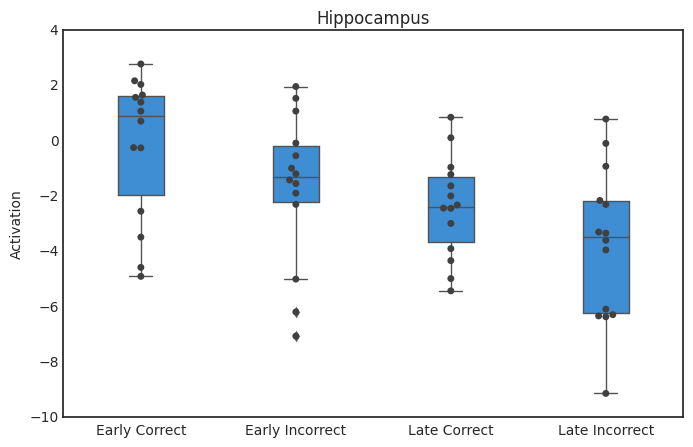

In [8]:
for key in hp_split_df:
    print "Mean {0}: ".format(key), np.mean(hp_split_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(hp_split_df['{0}'.format(key)])
    print ""
N = 4
conditions = ['Early Correct', 'Early Incorrect', 'Late Correct', 'Late Incorrect']
hp_allsubjs = [hp_split_df['early_corr'], hp_split_df['early_incorr'], 
               hp_split_df['late_corr'], hp_split_df['late_incorr']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Activation")
ax.set_title("Hippocampus")
plt.savefig("/home/arenf001/earlyvslate.png", dpi = 1080)
plt.show()

Early vs. Late Ttest_relResult(statistic=2.8830999650148867, pvalue=0.012816938213011841)
Cohen's d =  1.31976997093


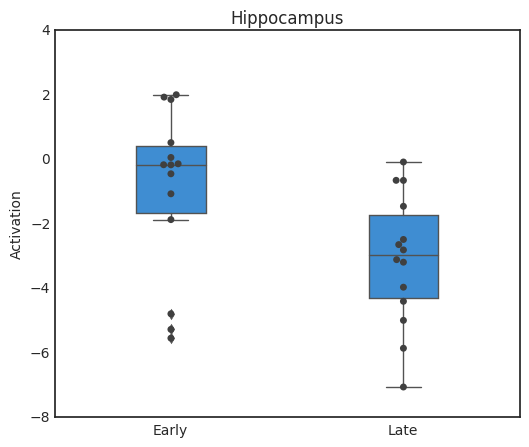

In [14]:
from math import sqrt
halves = {}
halves["early"] = hp_split_df[["early_corr", "early_incorr"]].mean(axis=1)
halves["late"] = hp_split_df[["late_corr", "late_incorr"]].mean(axis=1)
halves_df = pd.DataFrame(halves)
print "Early vs. Late", stats.ttest_rel(halves["early"], halves["late"])
cohens_d = ((np.average(halves["early"]) - np.average(halves["late"])) 
            / (sqrt((np.std(halves["early"], ddof = 1)) 
            ** 2 + np.std(halves["late"], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Early', 'Late']
hp_allsubjs = [halves["early"], halves["late"]]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (6,5))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Activation")
ax.set_title("Hippocampus")
plt.savefig("/home/arenf001/earlyvslate2.png", dpi = 1080)
plt.show()

In [25]:
halves_df

,early,late
0,1.993574,-3.113094
1,1.919961,-0.089352
2,-0.144915,-5.856994
3,-0.174623,-2.811977
4,-5.545556,-4.993349
5,-1.873838,-3.191816
6,0.050811,-4.403356
7,-0.454609,-1.461207
8,0.510521,-3.966606
9,-1.074109,-7.057476


## Medial PFC

In [8]:
mpfc_split_df

,early_corr,early_incorr,late_corr,late_incorr
0,0.158007,0.107103,3.094792,-0.084440
1,5.171661,4.372327,0.351701,3.703289
2,0.249322,-0.056982,-8.575603,-9.732324
3,-0.779176,1.356058,-8.785208,-7.020717
4,-6.654667,-8.288684,-3.123480,-5.535618
5,-1.968880,-0.193853,-1.903273,-2.273964
6,3.217743,0.497313,-2.997581,-2.766505
7,1.032224,-0.385460,-5.317765,-1.102663
8,2.730192,0.021583,-3.448107,-0.280775
9,-3.845759,-0.225043,-5.456235,-5.973209


Mean early_corr:  -0.339847106309
STD early_corr:  4.24550574244

Mean early_incorr:  -0.685474662908
STD early_incorr:  4.67189374716

Mean late_corr:  -2.844247796
STD late_corr:  3.48761153576

Mean late_incorr:  -2.28315381493
STD late_incorr:  3.82674333686



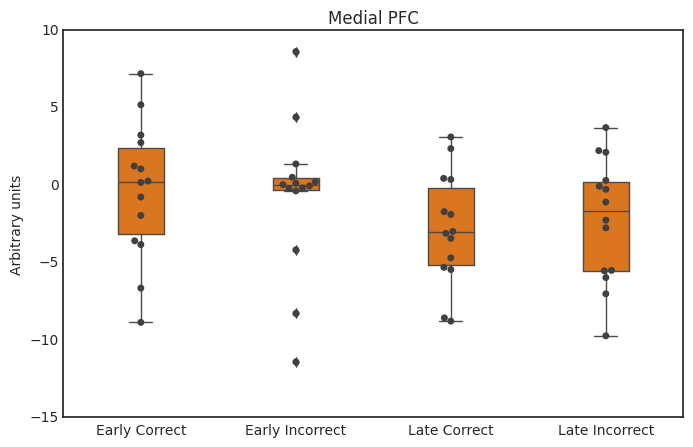

In [9]:
for key in mpfc_split_df:
    print "Mean {0}: ".format(key), np.mean(mpfc_split_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(mpfc_split_df['{0}'.format(key)])
    print ""
N = 4
conditions = ['Early Correct', 'Early Incorrect', 'Late Correct', 'Late Incorrect']
mpfc_allsubjs = [mpfc_split_df['early_corr'], mpfc_split_df['early_incorr'], 
                 mpfc_split_df['late_corr'], mpfc_split_df['late_incorr']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#f97401", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Medial PFC")
plt.show()

## Caudate

In [10]:
caud_split_df

,early_corr,early_incorr,late_corr,late_incorr
0,6.419940,6.609284,5.429038,3.982083
1,4.474735,4.479582,-2.004928,-4.459460
2,3.211371,5.016066,-7.112051,-4.994576
3,4.328662,5.525779,-5.726317,-3.637464
4,0.461893,-0.115340,0.318470,-3.129941
5,-0.344716,1.974651,0.473860,-1.386057
6,4.114674,2.548183,-0.867763,-3.411676
7,2.803656,-1.127718,-0.609157,0.031284
8,4.214879,1.460695,1.019508,6.264479
9,2.763937,4.873298,-0.537405,3.525628


Mean early_corr:  2.75830067836
STD early_corr:  2.51850423302

Mean early_incorr:  2.69529725682
STD early_incorr:  3.03612569292

Mean late_corr:  -0.874962772642
STD late_corr:  2.91603779726

Mean late_incorr:  -0.544888916825
STD late_incorr:  3.25914727539



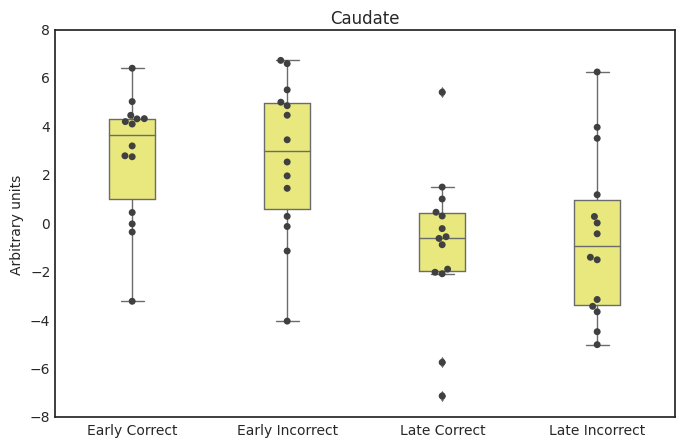

In [11]:
for key in caud_split_df:
    print "Mean {0}: ".format(key), np.mean(caud_split_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(caud_split_df['{0}'.format(key)])
    print ""
N = 4
conditions = ['Early Correct', 'Early Incorrect', 'Late Correct', 'Late Incorrect']
caud_allsubjs = [caud_split_df['early_corr'], caud_split_df['early_incorr'], 
                 caud_split_df['late_corr'], caud_split_df['late_incorr']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = caud_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caud_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate")
plt.show()

## Putamen

In [12]:
put_split_df

,early_corr,early_incorr,late_corr,late_incorr
0,6.191630,7.279416,3.478906,-4.314314
1,3.940614,3.720533,0.084210,-0.357998
2,-0.199164,1.546016,-4.420065,-7.540644
3,0.394536,-1.067959,-2.141317,-0.537190
4,-2.507773,-2.279052,-0.279932,-3.620637
5,-0.154566,3.314404,1.000674,0.118557
6,1.397221,-2.932964,-1.304876,-5.250762
7,2.760320,-2.831260,0.536667,0.430817
8,1.921841,1.287684,0.808688,2.106331
9,1.471027,2.541919,0.602636,-0.148650


Mean early_corr:  1.21393360162
STD early_corr:  2.59506984593

Mean early_incorr:  0.592769717886
STD early_incorr:  3.50269657984

Mean late_corr:  -0.0964958518744
STD late_corr:  2.01856227166

Mean late_incorr:  -1.58324941602
STD late_incorr:  2.55831222687



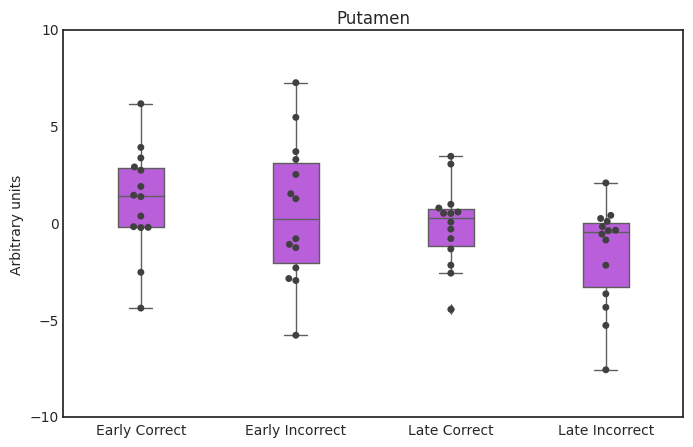

In [13]:
for key in put_split_df:
    print "Mean {0}: ".format(key), np.mean(put_split_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(put_split_df['{0}'.format(key)])
    print ""
N = 4
conditions = ['Early Correct', 'Early Incorrect', 'Late Correct', 'Late Incorrect']
put_allsubjs = [put_split_df['early_corr'], put_split_df['early_incorr'], 
                put_split_df['late_corr'], put_split_df['late_incorr']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = put_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = put_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen")
plt.show()